# Introduction to artificial neural networks (ANN)

by Felix Fritzen fritzen@mib.uni-stuttgart.de, January 2021

additional material for the course *Data Processing for Engineers and Scientists*

## Content
- overview on some common activation functions

$$ f(x) \in \{ \ x, \quad \tanh(x), \quad \mathrm{sigmoid}(x), \quad \langle x \rangle_+, \quad \log( 1+e^x) \ \}$$

In [29]:
# preface
import numpy as np
from itertools import cycle

import matplotlib.pyplot as plt
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'], 'size':14})

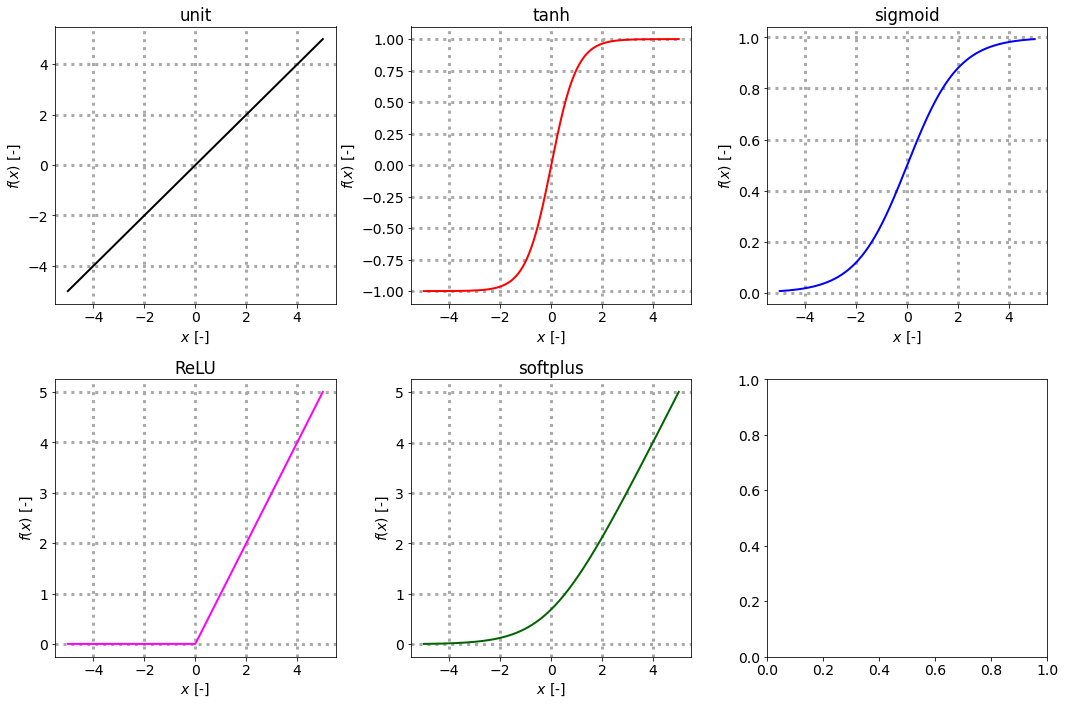

In [30]:
x           = []
x.append(np.linspace(-5,5,2001))
y           = []
act_fct     = []
act_name    = []

act_fct.append( lambda x : x ) # unit
act_name.append('unit' )
act_name.append('tanh')
act_name.append('sigmoid')
act_name.append('ReLU')
act_name.append('softplus')
act_fct.append( lambda x : np.tanh(x)) # tanh
act_fct.append( lambda x : 1 / ( 1 + np.exp(-x) )) # sigmoid
act_fct.append( lambda x : np.maximum(x,0))
act_fct.append( lambda x : np.log( 1+np.exp(x)) )

n_x =  3
n_y =  int(np.floor((len(act_fct)+n_x-1)/n_x))
for X in x:
    
    fig, ax     = plt.subplots(n_y,n_x,figsize=(15,5*n_y))
    ax          = ax.flatten()
    gridls      = { 'linewidth' : 3, 'color' : '#AAAAAA', 'linestyle' : ':' }

    col         = ['black', 'red', 'blue', 'magenta', 'darkgreen', '']
    ax_it       = iter(ax)
    name_it     = iter(act_name)
    col_it      = cycle(col)


    for fct in act_fct:
        AX = next(ax_it)
        lab = next(name_it)
        AX.plot(X,fct(X),linewidth=2,color=next(col_it), label=lab )
        AX.set_xlabel(r'$x$ [-]')
        AX.set_ylabel(r'$f(x)$ [-]')
        AX.set_title(lab)
        AX.grid(**gridls)

    plt.tight_layout(pad=1.025) 

## Observations
- functions are almost linear (or constant) for $\vert x \vert > 4$
- nonlinearity is localized around $x\approx 0$
- ReLU is not differentiable at $x=0$; all other functions are analyical on $\mathbb{R}$
- $\tanh(x) = 2 \mathrm{sigmoid}(2x) - 1$
- softplus is a regularized ReLU that is analytical